In [191]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle, filter_terms_not_in_wemodel

In [3]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [224]:
RESULTS_FILEPATH = '../data/interim/association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = '../data/interim/experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = '../reports/figures/exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [219]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Value')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [153]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [246]:
def add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                   mean_first, mean_second, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    FIRST_ORDER_COLOR = 'black'
    SECOND_ORDER_COLOR = 'red'
    SHADE_DARKNESS = 0.2
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr_first)+1)]
    ax.scatter(arr_first, y, c=FIRST_ORDER_COLOR, s=S)
    ax.scatter(arr_second, y, c=SECOND_ORDER_COLOR, s=S)
    ax.xaxis.grid()
    ax.axvline(threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.',label='first-order threshold')
    ax.axvline(threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    ax.axvline(-threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.')
    ax.axvline(-threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.')
    ax.axvline(mean_first, c=FIRST_ORDER_COLOR, label='first-order mean')
    ax.axvline(mean_second, c=SECOND_ORDER_COLOR, label='second-order mean')
    #ax.axvspan(-threshold_first, threshold_first, alpha=SHADE_DARKNESS, color='black')
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.25it/s]


Rendering...


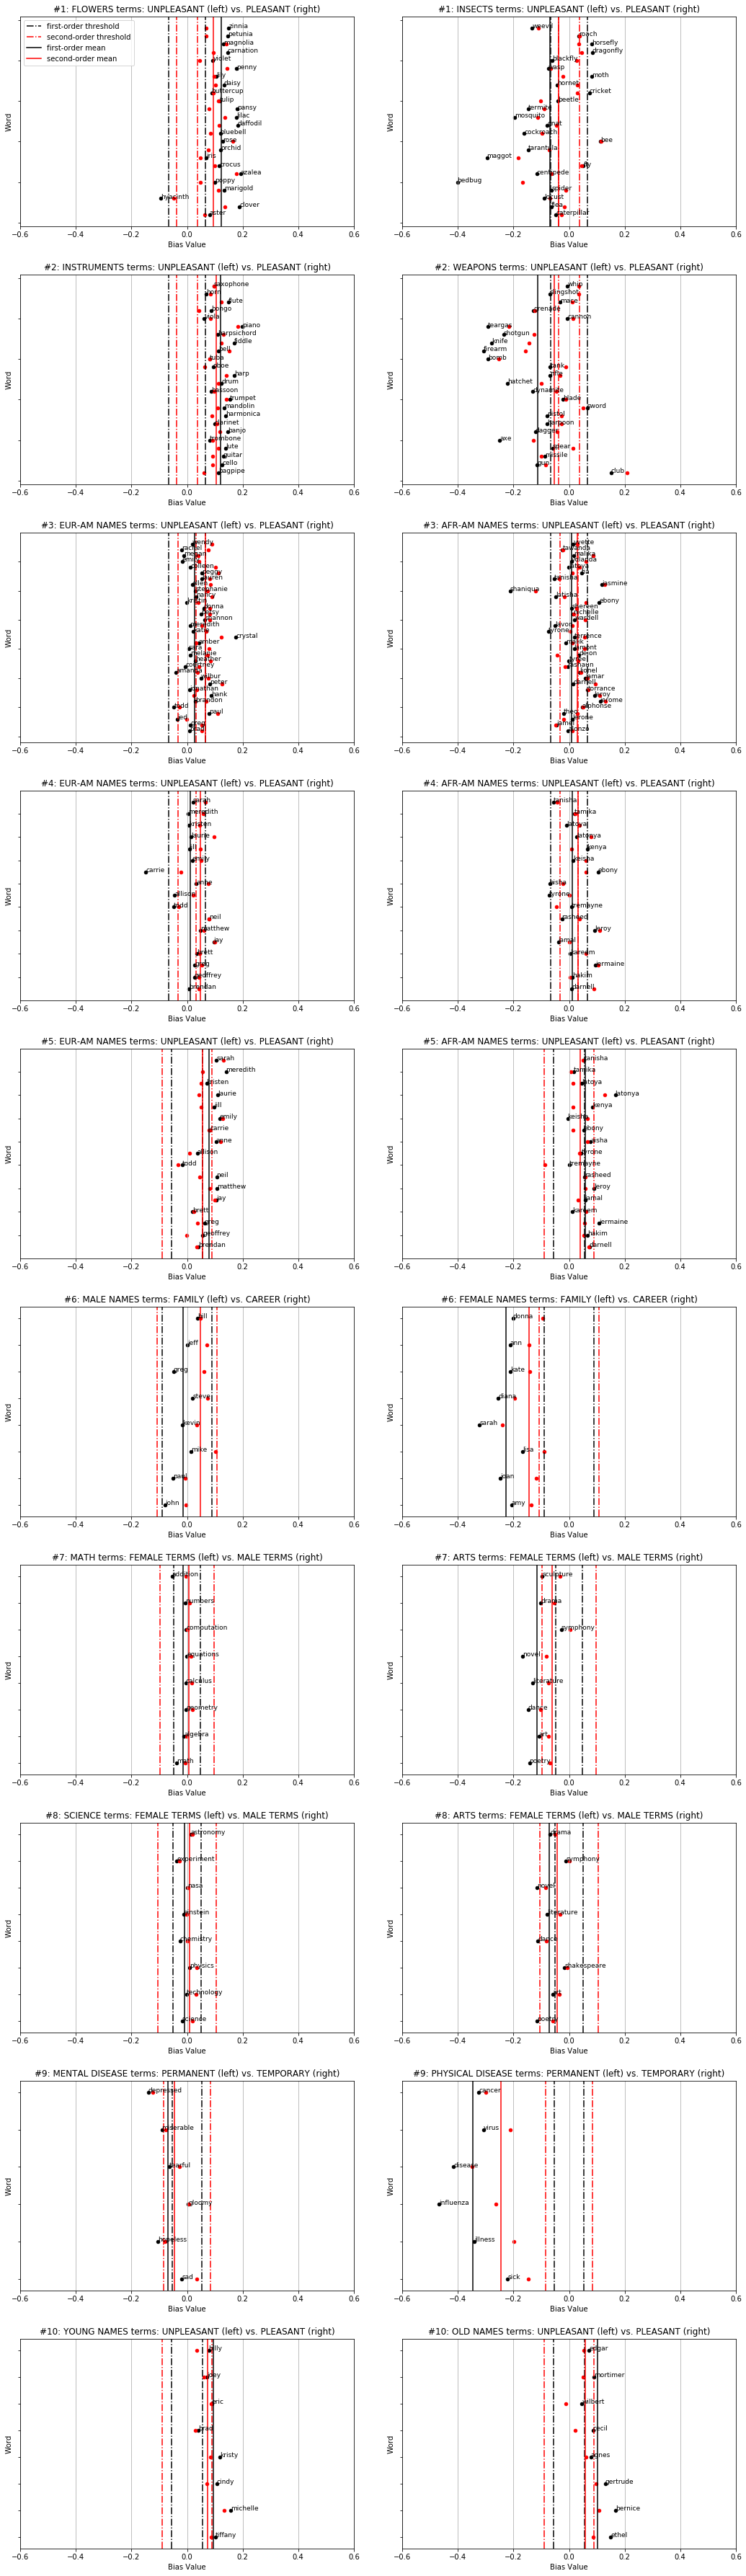

In [247]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr_first = results_dict[exp_num]['first'][f'{target_letter}_array']
    arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold_first = results_dict[exp_num]['first']['threshold']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_first = results_dict[exp_num]['first'][f'{target_letter}_mean']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    y = [i for i in range(1,len(arr_first)+1)]
    
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                    mean_first, mean_second, y)
    annotate_points(ax, terms, arr_first, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()

In [222]:
exp_def_dict[10]

{'X_terms': ['tiffany',
  'michelle',
  'cindy',
  'kristy',
  'brad',
  'eric',
  'joey',
  'billy'],
 'Y_terms': ['ethel',
  'bernice',
  'gertrude',
  'agnes',
  'cecil',
  'wilbert',
  'mortimer',
  'edgar'],
 'A_terms': ['joy',
  'love',
  'peace',
  'wonderful',
  'pleasure',
  'friend',
  'laughter',
  'happy'],
 'B_terms': ['agony',
  'terrible',
  'horrible',
  'nasty',
  'evil',
  'war',
  'awful',
  'failure'],
 'X_label': 'Mental Disease',
 'Y_label': 'Physical Disease',
 'A_label': 'Temporary',
 'B_label': 'Permanent'}

In [3]:
results_dict = open_pickle(RESULTS_FILEPATH)
results_dict

{1: defaultdict(dict,
             {'first': {'X_array': array([ 0.08113076,  0.18911934, -0.0954811 ,  0.13401467,  0.09897012,
                       0.19287561,  0.11558053,  0.06996465,  0.12096066,  0.12797187,
                       0.11942707,  0.18256408,  0.17806363,  0.17999095,  0.11687332,
                       0.08817419,  0.13236946,  0.10520089,  0.17782208,  0.09271343,
                       0.14632878,  0.13019669,  0.14671066,  0.15014505], dtype=float32),
               'Y_array': array([-0.04801004, -0.06460989, -0.08932857, -0.06297787, -0.40200305,
                      -0.1162259 ,  0.05139589, -0.29557508, -0.14763156,  0.11352445,
                      -0.1613886 , -0.0787251 , -0.19676779, -0.14766207, -0.03967397,
                       0.07359396, -0.04168847,  0.08253389, -0.0736915 , -0.06181172,
                       0.0839064 ,  0.08104831,  0.03454182, -0.13286161], dtype=float32),
               'X_mean': 0.12423697,
               'Y_mean': -0.0683